In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
missing_values = titanic.isnull().sum()

In [6]:
missing_values.dropna().sum()

866

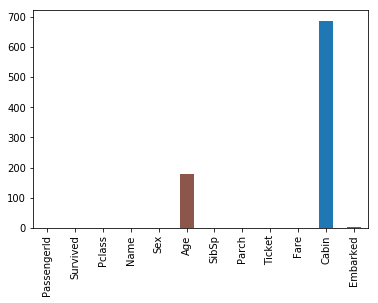

In [7]:
missing_values.plot(kind='bar');

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# titanic['Embarked'].dropna(inplace=True)
titanic.dropna(inplace=True, subset=['Embarked'])

In [10]:
titanic['Embarked'].isnull().sum()

0

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
titanic['Cabin'].fillna(value='**¯\\_(ツ)_/¯**', inplace=True)

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [15]:
titanic['FamilyCount'] = (titanic.SibSp + titanic.Parch)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0


In [17]:
titanic['IsReverend'] = np.where(titanic['Name'].str.contains('Rev'), 1, 0)

1. What was the survival rate overall?

38.2%

In [18]:
# total_embarked = total_died+total_survived
total_embarked = titanic['Survived'].value_counts().sum()

In [19]:
titanic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [20]:
overall_sr = round(titanic['Survived'].mean()*100, 1)

overall_sr

38.2

In [21]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=False)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,1,0,0,1


In [23]:
titanic.groupby('Sex_male').agg({'Survived': np.mean})

,Survived
Sex_male,
0,0.740385
1,0.188908


In [24]:
female_sr = (round(titanic.groupby('Sex_male').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [25]:
male_sr = (round(titanic.groupby('Sex_male').agg({'Survived': np.mean}).iloc[1,0], 2)*100)

In [26]:
male_sr

19.0

In [27]:
female_sr

74.0

2. Which gender fared the worst? What was their survival rate?

Men fared far worse at 19.0%. Compared to women at 74.0%.

In [28]:
titanic.groupby('Pclass').agg({'Survived': np.mean})

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [29]:
pclass_1 = (round(titanic.groupby('Pclass').agg({'Survived': np.mean}).iloc[0,0], 2)*100)
pclass_2 = (round(titanic.groupby('Pclass').agg({'Survived': np.mean}).iloc[1,0], 2)*100)
pclass_3 = (round(titanic.groupby('Pclass').agg({'Survived': np.mean}).iloc[2,0], 2)*100)


In [30]:
pclass_1, pclass_2, pclass_3

(63.0, 47.0, 24.0)

3. What was the survival rate for each Pclass?

1 = 63.0%

2 = 47.0%

3 = 24.0%

In [31]:
rev_sr = (round(titanic.groupby('IsReverend').agg({'Survived': np.mean}).iloc[1,0], 2)*100)

In [32]:
rev_sr

0.0

4. Did any reverends survive? How many?

There were 6 reverends, but none of them survived.

In [33]:
cabins_nan_sr = (round(titanic.groupby('Cabin').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [34]:
cabins_nan_sr

30.0

5. What is the survival rate for cabins marked **¯\(ツ)/¯**?

Survival rate **¯\(ツ)/¯** = 30%


In [35]:
age_empty_sr = round((titanic['Age'].isnull().sum()) / (titanic['Age'].count())*100, 2)

In [36]:
age_empty_sr

24.86

6. What is the survival rate for people whose Age is empty?

Survival rate Age empty = 24.86%

In [37]:
embarked_q_sr = (round(titanic.groupby('Embarked_Q').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [38]:
embarked_s_sr = (round(titanic.groupby('Embarked_S').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [39]:
embarked_c_sr = (round(titanic.groupby('Embarked_C').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [40]:
embarked_q_sr, embarked_s_sr, embarked_c_sr

(38.0, 50.0, 34.0)

7. What is the survival rate for each port of embarkation?

Embarked_Q = 38.0%

Embarked_S = 50.0%

Embarked_C = 34.0%

In [41]:
titanic.groupby(['Survived', 'Pclass']).sum()

PassengerId      Age  SibSp  Parch        Fare  FamilyCount  \
Survived Pclass                                                                
0        1             32824  2796.50     23     24   5174.7206           47   
         2             43856  3019.00     31     14   1882.9958           45   
         3            168732  7170.00    250    143   5085.0035          393   
1        1             65989  4214.92     67     53  12842.6919          120   
         2             38200  2149.83     43     56   1918.8459           99   
         3             46893  1754.92     52     50   1629.6916          102   

                 IsReverend  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
Survived Pclass                                                             
0        1                0         3.0      77.0        26.0         1.0   
         2                6         6.0      91.0         8.0         1.0   
         3                0        72.0     300.0        41.0        45.0   
1        1                0        89.0      45.0        59.0         1.0   
         2                0        70.0      17.0         9.0         2.0   
         3                0        72.0      47.0        25.0        27.0   

                 Embarked_S  
Survived Pclass              
0        1             53.0  
         2             88.0  
         3            286.0  
1        1             74.0  
         2             76.0  
         3             67.0

In [42]:
# kid_pclass_sr = titanic[titanic['Age'] < 12].groupby('Pclass')['Survived'].sum()
kid_pclass_1 = (round(titanic[titanic['Age'] < 12].groupby('Pclass').agg({'Survived': np.mean}).iloc[0,0], 2)*100)

In [43]:
kid_pclass_2 = (round(titanic[titanic['Age'] < 12].groupby('Pclass').agg({'Survived': np.mean}).iloc[1,0], 2)*100)

In [44]:
kid_pclass_3 = (round(titanic[titanic['Age'] < 12].groupby('Pclass').agg({'Survived': np.mean}).iloc[2,0], 2)*100)

In [45]:
kid_pclass_1, kid_pclass_2, kid_pclass_3

(75.0, 100.0, 40.0)

What is the survival rate for children (under 12) in each Pclass?


8. What is the survival rate for children (under 12) in each Pclass?

Child_Pclass_1 = 75.0%

Child_Pclass_2 = 100.0%

Child_Pclass_3 = 40.0%

In [46]:
np.where(titanic['Name'].str.contains('Cap'))

(array([744]),)

In [47]:
titanic.iloc[744]

PassengerId                             746
Survived                                  0
Pclass                                    1
Name           Crosby, Capt. Edward Gifford
Age                                      70
SibSp                                     1
Parch                                     1
Ticket                            WE/P 5735
Fare                                     71
Cabin                                   B22
FamilyCount                               2
IsReverend                                0
Sex_female                                0
Sex_male                                  1
Embarked_C                                0
Embarked_Q                                0
Embarked_S                                1
Name: 745, dtype: object

9. Did the captain of the ship survive? Is he on the list?

He is on the list at #744 and no. Capt. Edward Gifford Crosby went down with his ship.

In [48]:
max_fare = titanic.groupby(['Survived'])['Fare'].max()
max_fare_died = max_fare.iloc[0]

In [49]:
max_fare_died

263.0

10. Of all the people that died, who had the most expensive ticket? How much did it cost?

$263.00

In [50]:
died_with_family = titanic.groupby(['Survived'])['FamilyCount'].value_counts().iloc[1:9].sum()
# titanic.groupby('FamilyCount').agg({'Survived': np.mean})

In [51]:
survived_with_family = titanic.groupby(['Survived'])['FamilyCount'].value_counts().iloc[10:].sum()

In [52]:
died_with_family, survived_with_family

(175, 179)

11. Does having family on the boat help or hurt your chances of survival?

Having a family helped your chances of survival, but not by much.

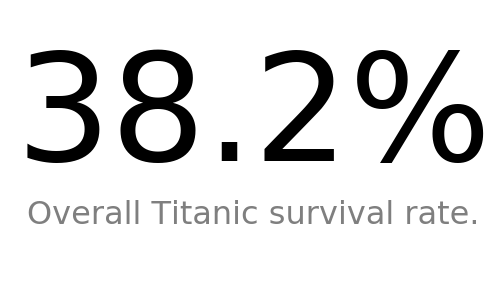

In [53]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.6,
         s = str('38.2') + '%',
         ha = 'center',
         va = 'center',
         size = 150,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0.25,
         s = str('Overall Titanic survival rate.'),
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 0.5)

# No axes.
plt.axis('off');

In [54]:
male_sr/overall_sr*100

49.738219895287955

In [55]:
round(male_sr/total_embarked*100, 1)

2.1

In [56]:
round(female_sr/total_embarked*100, 1)

8.3

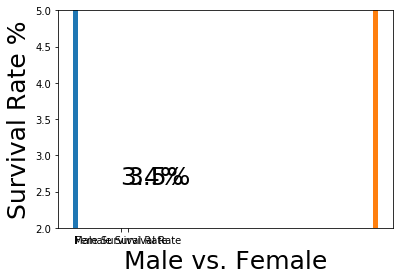

In [57]:
plt.bar(x=male_sr, 
        height=(male_sr*100))
plt.bar(x=female_sr, 
        height=(female_sr*100))
plt.ylim(2,5)
plt.xticks(np.arange(27.3, 29, 1.3), ('Male Survival Rate', 
                                      'Female Survival Rate'))
plt.ylabel('Survival Rate %', size=25)
plt.xlabel('Male vs. Female', size=25)
plt.text(x = 27.1,
         y = 2.6,
         s = '3.4%',
         fontsize = 25)
plt.text(x = 28.4,
         y = 2.6,
         s = '3.5%',
         fontsize = 25);

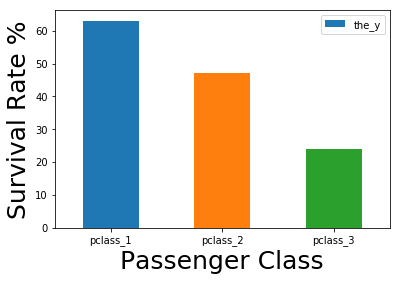

In [58]:
answer_3 = pd.DataFrame({'Passenger Class':['pclass_1', 
                                  'pclass_2', 
                                  'pclass_3'], 
                         'the_y':[pclass_1, 
                                  pclass_2, 
                                  pclass_3]})
ax = answer_3.plot.bar(x='Passenger Class', 
                       y='the_y', 
                       rot=0)

plt.ylabel('Survival Rate %', size=25)
plt.xlabel('Passenger Class', size=25);

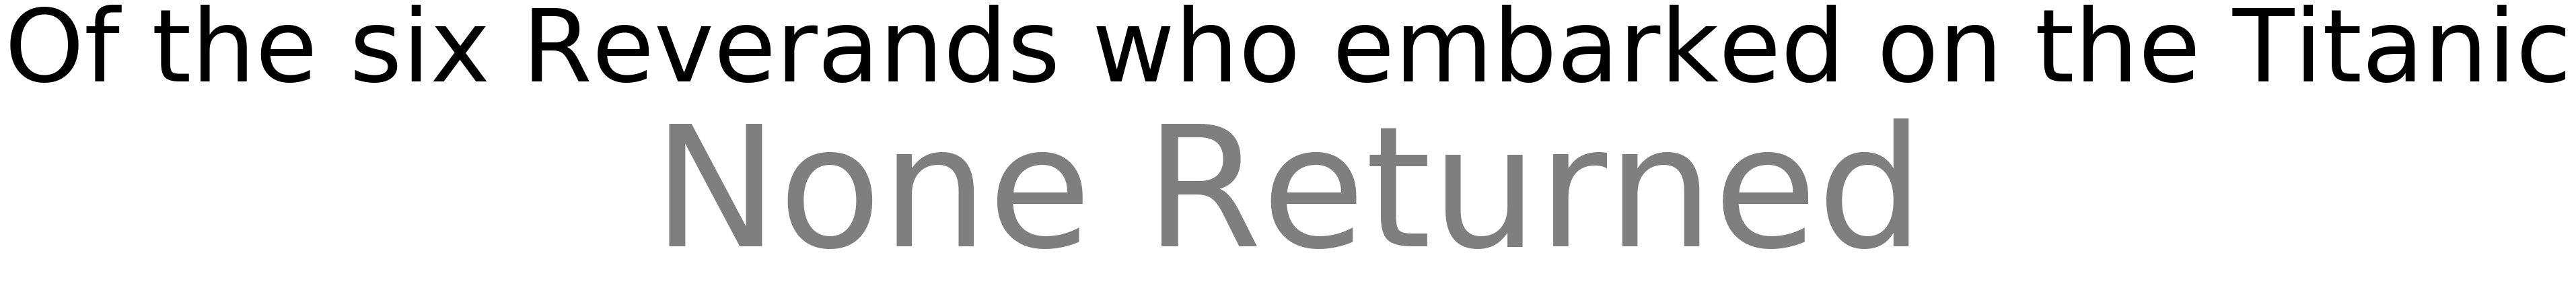

In [59]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.8,
         s = str('Of the six Reverands who embarked on the Titanic'),
         ha = 'center',
         va = 'center',
         size = 150,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0,
         s = str('None Returned'),
         ha = 'center',
         va = 'center',
         size = 250,
         alpha = 0.5)

# No axes.
plt.axis('off');

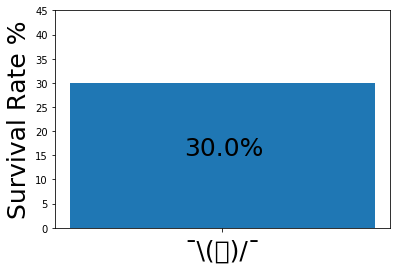

In [60]:
plt.bar(x='',
        height=(cabins_nan_sr))

plt.ylim(0, 45)
plt.ylabel('Survival Rate %', size=25)
plt.xlabel('¯\(ツ)/¯', size=25)
plt.text(x = -.1,
         y = 15,
         s = '30.0%',
         fontsize = 25);

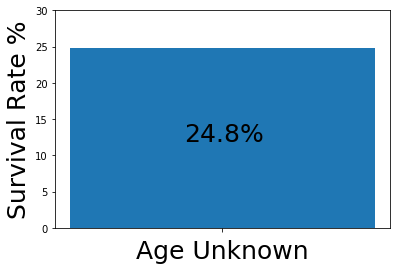

In [61]:
plt.bar(x='',
        height=(age_empty_sr))

plt.ylim(0, 30)
plt.ylabel('Survival Rate %', size=25)
plt.xlabel('Age Unknown', size=25)
plt.text(x = -.1,
         y = 12,
         s = '24.8%',
         fontsize = 25);

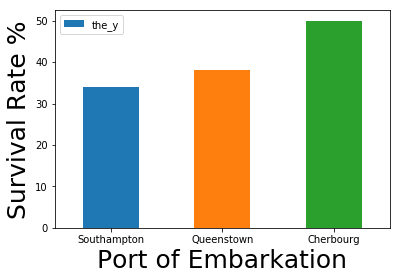

In [62]:
answer_7 = pd.DataFrame({'port_of_embark':['Southampton', 
                                  'Queenstown', 
                                  'Cherbourg'], 
                         'the_y':[embarked_c_sr, 
                                  embarked_q_sr, 
                                  embarked_s_sr]})
ax = answer_7.plot.bar(x='port_of_embark', 
                       y='the_y', 
                       rot=0)

plt.ylabel('Survival Rate %', size=25)
plt.xlabel('Port of Embarkation', size=25);

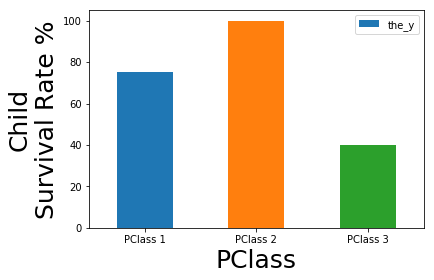

In [63]:
answer_8 = pd.DataFrame({'kid_pclass_sr':['PClass 1', 
                                  'PClass 2', 
                                  'PClass 3'], 
                         'the_y':[kid_pclass_1, 
                                  kid_pclass_2, 
                                  kid_pclass_3]})
ax = answer_8.plot.bar(x='kid_pclass_sr', 
                       y='the_y', 
                       rot=0)

plt.ylabel('Child\nSurvival Rate %', size=25)
plt.xlabel('PClass', size=25);

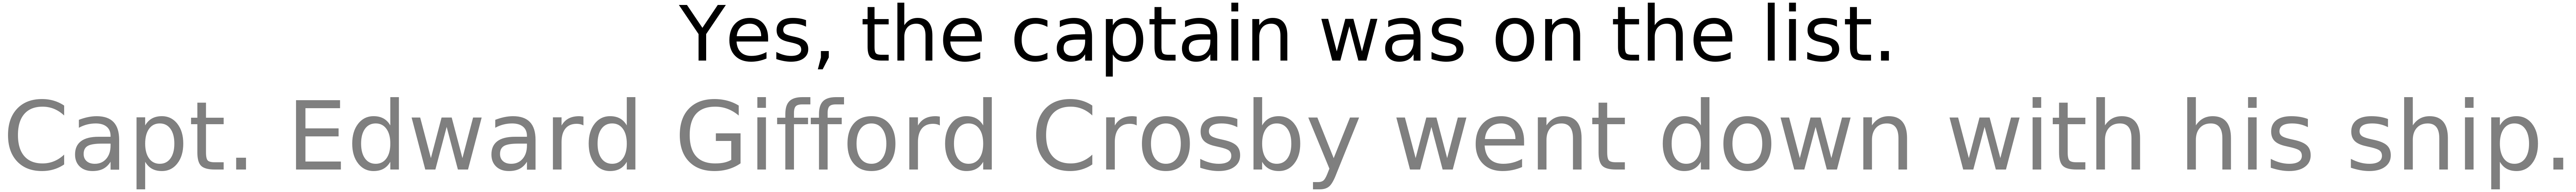

In [64]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 1,
         s = str('Yes, the captain was on the list.'),
         ha = 'center',
         va = 'center',
         size = 200,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0,
         s = str('Capt. Edward Gifford Crosby went down with his ship.'),
         ha = 'center',
         va = 'center',
         size = 250,
         alpha = 0.5)

# No axes.
plt.axis('off');

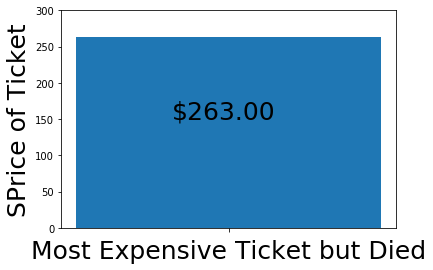

In [65]:
plt.bar(x='',
        height=(max_fare_died))

plt.ylim(0, 300)
plt.ylabel('SPrice of Ticket', size=25)
plt.xlabel('Most Expensive Ticket but Died', size=25)
plt.text(x = -.15,
         y = 150,
         s = '$263.00',
         fontsize = 25);

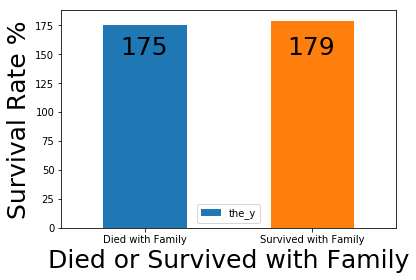

In [66]:
answer_11 = pd.DataFrame({'Died':['Died with Family',
                                  'Survived with Family'], 
                         'the_y':[died_with_family, 
                                  survived_with_family]})
plt = answer_11.plot.bar(x='Died', 
                         y='the_y', 
                         rot=0)



plt.set_ylabel('Survival Rate %', size=25)
plt.set_xlabel('Died or Survived with Family', size=25)

plt.text(x = -.15,
         y = 150,
         s = died_with_family,
         fontsize = 25)
plt.text(x = .85,
         y = 150,
         s = survived_with_family,
         fontsize = 25);